Import commands

In [1]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)

In [2]:
ww = pd.read_csv('/content/winequality-white.csv', sep= ";")
ww.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


2. Illustrate the correlation matrix of all features and the target.


In [ ]:
ww.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


3. Plot a histogram of the target values.

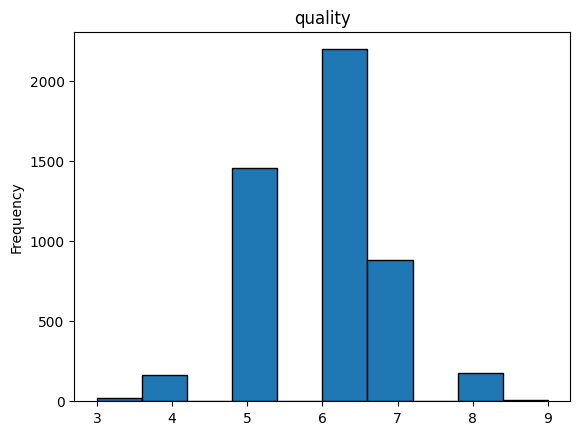

In [20]:
ax = ww.hist('quality', grid = False, edgecolor = 'black')
plt.ylabel('Frequency')
plt.show()

4. Illustrate the violin plots of all features. Make sure that each plot is visible.
(Some of the variables have very small values where as dioxide variables have quite large values)

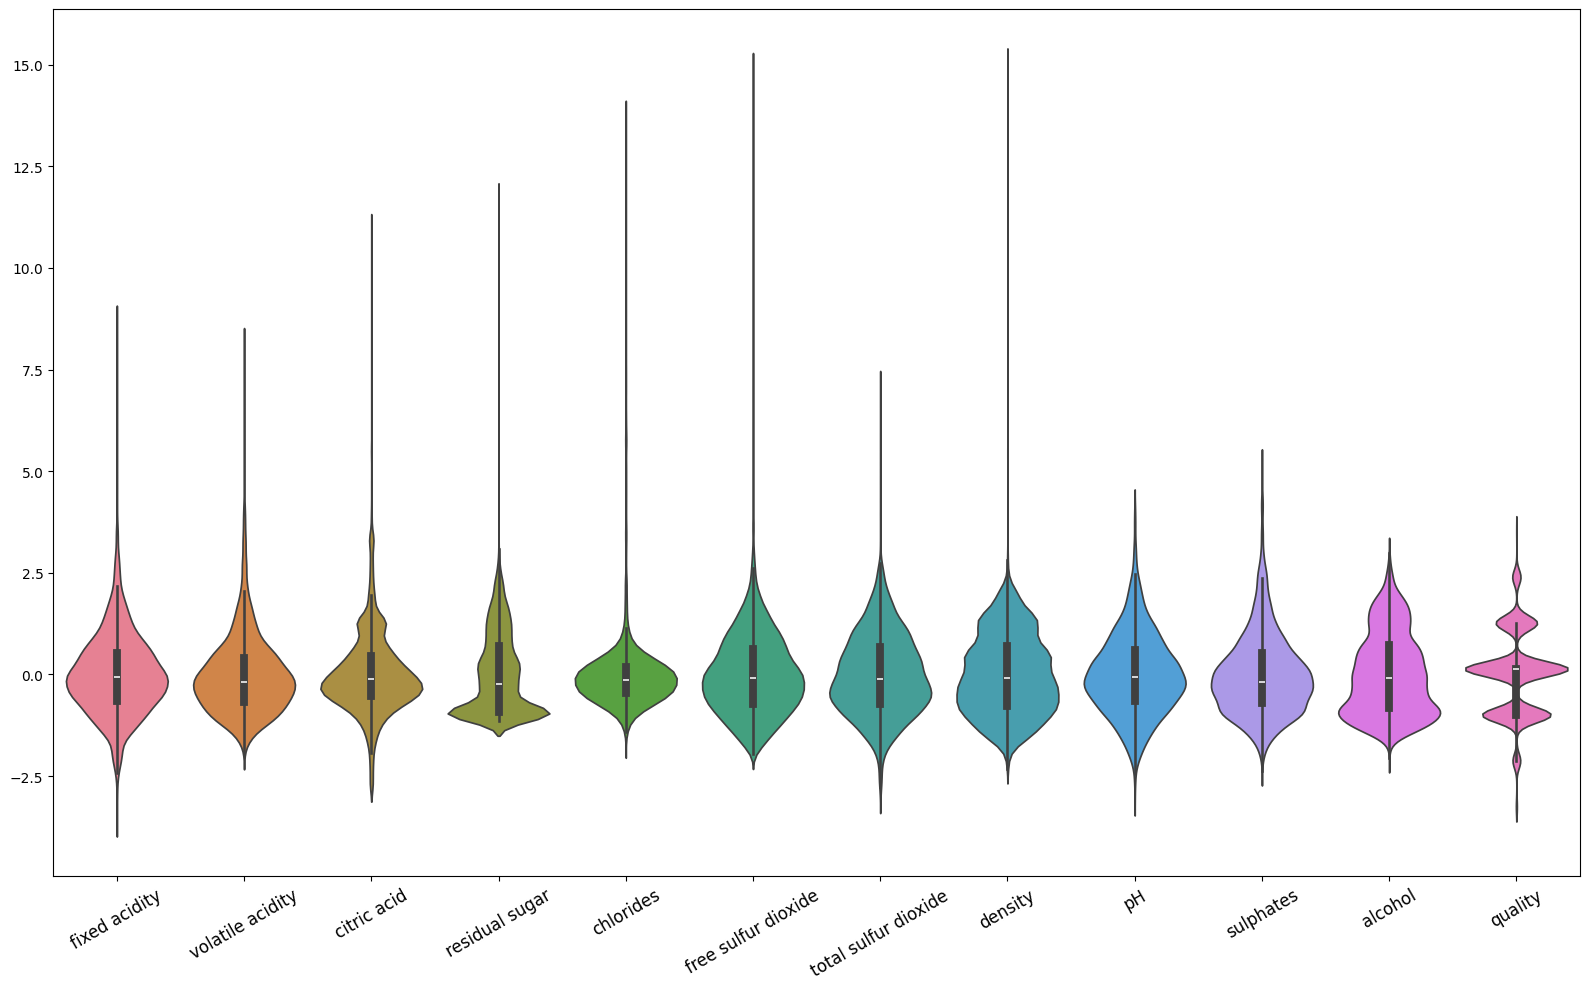

In [7]:
# Scaling values for readability
scaler = StandardScaler()
scaled_ww = pd.DataFrame(scaler.fit_transform(ww), columns = ww.columns)

plt.figure(figsize = (16, 10))
sns.violinplot(data = scaled_ww)

# Readable x-axis and displaying violin plot
plt.xticks(rotation = 30, fontsize = 12)
plt.tight_layout()
plt.show()

5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.

Intercept = 2.582009399174922
Coefficient = 0.3134693019118325
RMSE = 0.7971284628753889
R2 = 0.1897253327492563


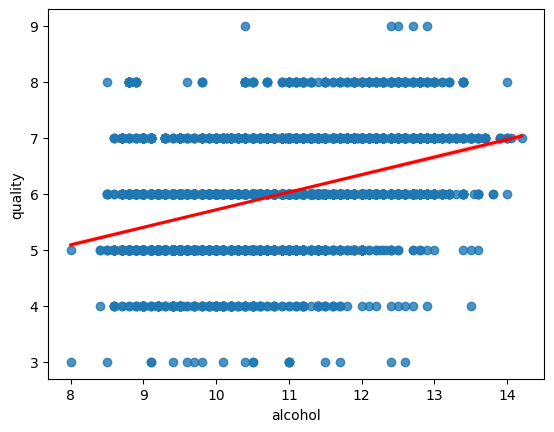

In [17]:
# Plotting points and regression line
sns.regplot(x = 'alcohol', y = 'quality', data = ww, line_kws = {'color': 'red'})

# Training model with single input variable
model = LinearRegression()
model.fit(ww[['alcohol']], ww['quality'])
print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')

# Making predictions to find RMSE and R^2
fitted = model.predict(ww[['alcohol']])
RMSE = np.sqrt(mean_squared_error(ww['quality'], fitted))
R2 = r2_score(ww['quality'], fitted)

print(f'RMSE = {RMSE}')
print(f'R2 = {R2}')

6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.

In [ ]:
# Training model with 3 input variables (volatile acidity, alcohol, and density)
model = LinearRegression()
model.fit(ww[['volatile acidity', 'alcohol', 'density']], ww['quality'])
print(f'Intercept = {model.intercept_}')
print(f'Coefficient = {model.coef_[0]}')

# Making predictions to find RMSE and R^2
fitted = model.predict(ww[['volatile acidity', 'alcohol', 'density']])
RMSE = np.sqrt(mean_squared_error(ww['quality'], fitted))
R2 = r2_score(ww['quality'], fitted)

print(f'RMSE = {RMSE}')
print(f'R^2 = {R2}')

Intercept = -36.498611307001624
Coefficient = -2.0721159353329517
RMSE = 0.76848726881725
R^2 = 0.24690635619896484
